# Project - Grinding Dynamic Simulation Model

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

%matplotlib inline

In [2]:
def dxdt(t, x, feed, r, b_matrix, d):
    """Ordinary differential equations describing the rate of change of
    mill charge in each size fraction.  This is the 'General Grinding
    Model' described in Molycop Tools spreadsheet (Eq. 3).  Note, t is
    redundant in this case but is included for compatibility with
    numerical solvers which are designed for the general case where dxdt
    can be a function of time also.
    
    Args:
        t (float): Time (mins).
        x (array): Charge load (tons).
        feed (np.ndarray): Mill feed (tons).
        r (array): Breakage rates (selection function).
        b_matrix (array): Breakage matrix (appearance functions).
        d (array): Discharge grate efficiencies.
    """
    return feed + r*(b_matrix - np.diag(d + 1)) @ x

In [3]:
def solve(t, x0, dxdt, timestep_size, args):
    """Estimates x at time t + timestep by starting at x0 and
    using the derivate function dxdt to numerically solve the
    initial value problem.
    """
    t2 = t + timestep_size
    sol = solve_ivp(dxdt, t_span=[t, t2], y0=x0, method='Radau',
                    args=args)
    assert sol.status == 0, "Solver failed."

    return sol.y[:, -1]

In [4]:
# Calculation example

feed = np.array([ 2,  1,  0]).T
d = np.array([  0, 0.5, 1.0]).T
r = np.array([0.2, 0.4, 0.1]).T

# Initial charge
x0 = np.array([30, 30, 30])

# Breakage matrix
b_matrix = np.array([
    [  0,   0,   0],
    [0.5,   0,   0],
    [0.5, 1.0,   0]
])

t = 0
timestep_size = 1.0
solve(t, x0, dxdt, timestep_size, args=[feed, r, b_matrix, d])

array([26.37461509, 19.31791794, 35.79988888])

In [5]:
# Simulate over time (with constant feed)
nt = 50
x = np.zeros((nt, 3))
x[0] = x0
t = np.arange(nt)*timestep_size
for k in range(1, nt):
    x[k, :] = solve(t[k], x[k-1], dxdt, timestep_size, args=[feed, r, b_matrix, d])

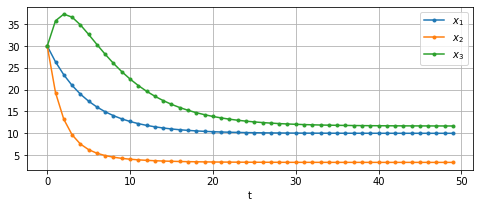

In [6]:
plt.figure(figsize=(8,3))
plt.plot(t, x, '.-')
plt.xlabel('t')
plt.grid()
plt.legend(['$x_%d$' % i for i in range(1,3+1)])
plt.show()